In [1]:
import pandas as pd
import numpy as np
import ast

In [11]:
products = pd.read_csv("recommendation-system/datasets/marketing_sample_for_walmart_com-walmart_com_product_review__20200701_20201231__5k_data.tsv", sep='\t')
products.head()

,Uniq Id,Crawl Timestamp,Dataset Origin,Product Id,Product Barcode,Product Company Type Source,Product Brand Source,Product Brand Normalised Source,Product Name Source,Match Rank,...,Product Currency,Product Available Inventory,Product Image Url,Product Model Number,Product Tags,Product Contents,Product Rating,Product Reviews Count,Bsr,Joining Key
0,1705736792d82aa2f2d3caf1c07c53f4,2020-09-24 03:21:12 +0000,NaN,2e17bf4acecdece67fc00f07ad62c910,NaN,Competitor,NaN,NaN,NaN,NaN,...,USD,111111111,https://i5.walmartimages.com/asr/0e1f4c51-c1a4...,NaN,"OPI Infinite Shine, Nail Lacquer Nail Polish, ...",NaN,NaN,NaN,NaN,81350af1be98d3753cf964709f0c766a
1,95a9fe6f4810fcfc7ff244fd06784f11,2020-10-30 14:04:08 +0000,NaN,076e5854a62dd283c253d6bae415af1f,NaN,Competitor,NaN,NaN,NaN,NaN,...,USD,111111111,https://i5.walmartimages.com/asr/9c8e42e4-13a5...,NaN,"Nice 'n Easy Permanent Color, 111 Natural Medi...",NaN,NaN,NaN,NaN,0353e63907dc0de0c734db4690300057
2,8d4d0330178d3ed181b15a4102b287f2,2020-08-06 05:51:47 +0000,NaN,8a4fe5d9c7a6ed26cc44d785a454b124,NaN,Competitor,NaN,NaN,NaN,NaN,...,USD,111111111,https://i5.walmartimages.com/asr/e3a601c2-6a2b...,NaN,Clairol Nice 'N Easy Permanent Color 7/106A Na...,NaN,4.5,29221.0,NaN,b6985c8e94815fbca2319dbb8bf228af
3,fddc4df45b35efd886794b261f730c51,2020-07-15 11:22:04 +0000,NaN,03b5fb878a33eadff8b033419eab9669,NaN,Competitor,NaN,NaN,NaN,NaN,...,USD,111111111,https://i5.walmartimages.com/asr/25b4b467-bc61...,NaN,"Kokie Professional Matte Lipstick, Hot Berry, ...",NaN,NaN,NaN,NaN,85b70fded09186f00467cea2f935b779
4,0990cf89a59ca6a0460349a3e4f51d42,2020-11-26T12:27:20+00:00,NaN,ce3d761e57d6ccad80619297b5b1bcbc,NaN,Competitor,NaN,NaN,NaN,NaN,...,USD,111111111,https://i5.walmartimages.com/asr/1a2ebb06-cd01...,NaN,"Gillette TRAC II Plus Razor Blade Refills, Fit...",NaN,NaN,131.0,NaN,41c870871328e97da6fb036bb7d4b2da


In [12]:
products.shape

(5000, 32)

In [4]:
products.isnull().sum()

Uniq Id                               0
Crawl Timestamp                       0
Dataset Origin                     5000
Product Id                            0
Product Barcode                    5000
Product Company Type Source           0
Product Brand Source               4861
Product Brand Normalised Source    4861
Product Name Source                4861
Match Rank                         5000
Match Score                        5000
Match Type                         5000
Retailer                              0
Product Category                     10
Product Brand                        13
Product Name                          0
Product Price                        42
Sku                                5000
Upc                                5000
Product Url                           0
Market                                0
Product Description                1127
Product Currency                      0
Product Available Inventory           0
Product Image Url                     0


In [13]:
products_new = products[['Uniq Id', 'Product Id', 'Product Category', 'Product Brand', 'Product Name', 'Product Price', 'Product Description', 'Product Image Url', 'Product Tags', 'Product Rating', 'Product Reviews Count']].copy()

In [6]:
products_new.head()

,Uniq Id,Product Id,Product Category,Product Brand,Product Name,Product Price,Product Description,Product Image Url,Product Tags,Product Rating,Product Reviews Count
0,1705736792d82aa2f2d3caf1c07c53f4,2e17bf4acecdece67fc00f07ad62c910,Premium Beauty > Premium Makeup > Premium Nail...,OPI,"OPI Infinite Shine, Nail Lacquer Nail Polish, ...",8.95,NaN,https://i5.walmartimages.com/asr/0e1f4c51-c1a4...,"OPI Infinite Shine, Nail Lacquer Nail Polish, ...",NaN,NaN
1,95a9fe6f4810fcfc7ff244fd06784f11,076e5854a62dd283c253d6bae415af1f,Beauty > Hair Care > Hair Color > Auburn Hair ...,Nice'n Easy,"Nice n Easy Permanent Color, 111 Natural Mediu...",29.86,Pack of 3 Pack of 3 for the UPC: 381519000201 ...,https://i5.walmartimages.com/asr/9c8e42e4-13a5...,"Nice 'n Easy Permanent Color, 111 Natural Medi...",NaN,NaN
2,8d4d0330178d3ed181b15a4102b287f2,8a4fe5d9c7a6ed26cc44d785a454b124,Beauty > Hair Care > Hair Color > Permanent Ha...,Clairol,Clairol Nice N Easy Permanent Color 7/106A Nat...,7.99,This Clairol Nice N Easy Permanent Color gives...,https://i5.walmartimages.com/asr/e3a601c2-6a2b...,Clairol Nice 'N Easy Permanent Color 7/106A Na...,4.5,29221.0
3,fddc4df45b35efd886794b261f730c51,03b5fb878a33eadff8b033419eab9669,Beauty > Makeup > Lip,Kokie Cosmetics,"Kokie Professional Matte Lipstick, Hot Berry, ...",5.16,Calling all matte lip lovers! Indulge in our r...,https://i5.walmartimages.com/asr/25b4b467-bc61...,"Kokie Professional Matte Lipstick, Hot Berry, ...",NaN,NaN
4,0990cf89a59ca6a0460349a3e4f51d42,ce3d761e57d6ccad80619297b5b1bcbc,Seasonal > Stock Up Essentials > Personal Care...,Gillette,"Gillette TRAC II Plus Razor Blade Refills, Fit...",19.97,"In 1971, Gillette introduced the Trac II razor...",https://i5.walmartimages.com/asr/1a2ebb06-cd01...,"Gillette TRAC II Plus Razor Blade Refills, Fit...",NaN,131.0


In [14]:
products_new.shape

(5000, 11)

In [8]:
products_new.isnull().sum()/products_new.isnull().count() * 100

Uniq Id                   0.00
Product Id                0.00
Product Category          0.20
Product Brand             0.26
Product Name              0.00
Product Price             0.84
Product Description      22.54
Product Image Url         0.00
Product Tags              0.00
Product Rating           56.12
Product Reviews Count    33.08
dtype: float64

<Axes: >

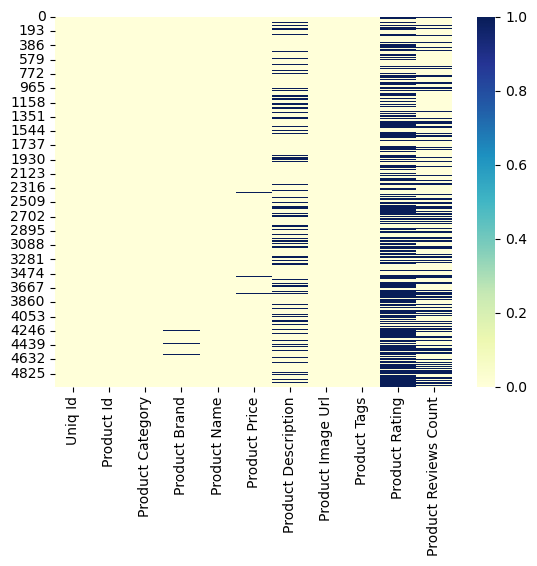

In [9]:
import seaborn as sns

sns.heatmap(products_new.isnull(), cbar=True, cmap="YlGnBu")

In [10]:
products_new[products_new['Product Category'].isnull()].index

Index([124, 394, 680, 821, 1281, 1683, 1765, 1993, 3661, 3975], dtype='int64')

In [11]:
products_new[products_new['Product Brand'].isnull()].index

Index([773, 1264, 2585, 2888, 3374, 4237, 4242, 4417, 4532, 4566, 4652, 4679,
       4812],
      dtype='int64')

In [12]:
products_new[products_new['Product Price'].isnull()].index

Index([ 100,  236,  276,  330,  828,  850,  962,  970,  999, 1339, 1400, 1587,
       1605, 1730, 1868, 1988, 2001, 2043, 2060, 2254, 2271, 2285, 2375, 2479,
       2548, 2696, 3317, 3431, 3465, 3511, 3741, 3826, 3828, 3833, 3909, 4084,
       4307, 4407, 4586, 4625, 4649, 4762],
      dtype='int64')

In [13]:
products_new.iloc[124]

Uniq Id                                   2eb6554bd61f6501092826ae1769f0c9
Product Id                                1d0ffa022e38d10c3f0e9b14b8135974
Product Category                                                       NaN
Product Brand                                                         Gain
Product Name             Gain Flings Moonlight Breeze, 42 Ct Laundry De...
Product Price                                                        11.97
Product Description      The light, delightful scent of Gain flings moo...
Product Image Url        https://i5.walmartimages.com/asr/515ba824-dc5e...
Product Tags             Gain Flings Moonlight Breeze, 42 Ct Laundry De...
Product Rating                                                         4.6
Product Reviews Count                                                343.0
Name: 124, dtype: object

In [15]:
products_new.dropna(subset=['Product Category', 'Product Price', 'Product Brand'], inplace=True)

products_new.reset_index(drop=True, inplace=True)

In [16]:
products_new.shape

(4935, 11)

In [16]:
products_new.isnull().sum()

Uniq Id                     0
Product Id                  0
Product Category            0
Product Brand               0
Product Name                0
Product Price               0
Product Description      1124
Product Image Url           0
Product Tags                0
Product Rating           2776
Product Reviews Count    1637
dtype: int64

In [17]:
products_new['Product Brand'].nunique()

1595

In [18]:
list(products_new['Product Brand'].unique())

['OPI',
 "Nice'n Easy",
 'Clairol',
 'Kokie Cosmetics',
 'Gillette',
 'Old Spice',
 'Colgate',
 'BMC',
 'Suave',
 'Vaseline',
 'The Art of Shaving',
 'ORLY',
 "L'Oreal Paris",
 'Pantene',
 'Vega',
 'Daily Concepts',
 'Magnifeko',
 'Hard Candy',
 'Crest',
 'TERRO',
 'ACT',
 'Refresh',
 'Hempz',
 'Better Homes & Gardens',
 'Cetaphil',
 'Hilitand',
 'La Mer',
 'Liverite',
 'Aveeno',
 'Head & Shoulders',
 'DenTek',
 'Zud',
 'Wahl',
 'Equate',
 'Kaboom',
 'Attends',
 'Medline',
 'Finish',
 'CHI',
 'Sexy Hair',
 'Makari',
 'Truform',
 'Fudge Professional',
 'SIMPLE WONDERS',
 'Natracare',
 'Sun&Skincare',
 'Depend',
 'Grisi',
 'Humco',
 'Dr. Hauschka',
 'OGX',
 'COVERGIRL',
 'Scotch-Brite',
 'Sportuli',
 'Neutrogena',
 'Sivan Health and Fitness',
 'Fixodent',
 'Herbal Essences',
 'Tinactin',
 'Design Essentials',
 'La Roche-Posay',
 'RESOLVE',
 'Coochy',
 'Gibs Grooming',
 'Turtle Wax',
 'Paul Sebastian',
 'Rimmel',
 'Nutrisse',
 'ProCare',
 'ShiKai',
 'Eucerin',
 'cleen beauty',
 'Bioastin'

In [18]:
def fill_brand_ratings(brands):
    df_processed = brands.copy()
    df_processed['Product Rating'] = df_processed['Product Rating'].fillna(
        df_processed.groupby('Product Brand')['Product Rating'].transform('mean')
    )
    
    return df_processed

In [19]:
products_ratings_filled = fill_brand_ratings(products_new)

In [21]:
products_ratings_filled[products_ratings_filled['Product Brand'] == 'Gillette']

,Uniq Id,Product Id,Product Category,Product Brand,Product Name,Product Price,Product Description,Product Image Url,Product Tags,Product Rating,Product Reviews Count
4,0990cf89a59ca6a0460349a3e4f51d42,ce3d761e57d6ccad80619297b5b1bcbc,Seasonal > Stock Up Essentials > Personal Care...,Gillette,"Gillette TRAC II Plus Razor Blade Refills, Fit...",19.97,"In 1971, Gillette introduced the Trac II razor...",https://i5.walmartimages.com/asr/1a2ebb06-cd01...,"Gillette TRAC II Plus Razor Blade Refills, Fit...",4.275,131.0
306,f8af78ec156a93d25935bdc5efb6316c,15be6978b98ec6530805c47a7f9d4e98,Personal Care > Shaving > Men's Shaving,Gillette,3 Pack - Gillette After Shave Gel Sensitive Sk...,13.94,Pack of 3 for the UPC: 047400188082 The best a...,https://i5.walmartimages.com/asr/34c4a590-f089...,3 Pack - Gillette After Shave Gel Sensitive Sk...,4.600,33.0
623,0a6c082e969568e4c9ef26278c55e861,6226c73c9cf1e2461e65404000d13a7f,Personal Care > Deodorants & Antiperspirants,Gillette,Gillette Wild Rain Clear Gel Mens Antiperspira...,4.97,Gillette Wild Rain Clear Gel Mens Antiperspira...,https://i5.walmartimages.com/asr/c6624906-60d2...,Gillette Wild Rain Clear Gel Men's Antiperspir...,4.200,5001.0
627,f0a82b0a6fbf9c244041f20c70abaeac,9b954ffbb70a67a3565da5011f72127f,Personal Care > Men's Essentials > Men's Bath ...,Gillette,Gillette Clear Gel Mens Anti-Perspirant/Deodor...,12.90,Gillette Cool Wave Clear Gel Mens Antiperspira...,https://i5.walmartimages.com/asr/68726cbb-c9ed...,Gillette Clear Gel Men's Anti-Perspirant/Deodo...,4.200,4682.0
745,6a6ac6d9ec9fadd9cecfd9478ecdbf32,ab9e1f6fab96dcac6ed9780980829bfa,Personal Care > Shaving > Razors > Gillette Ra...,Gillette,Gillette Trac II Plus Refill Razor Blade Cartr...,12.99,Gillette G II Plus Blades for Gillette Contour...,https://i5.walmartimages.com/asr/d19864e6-f6ac...,Gillette Trac II Plus Refill Razor Blade Cartr...,4.275,16.0
878,935b5830e8414fbefa929def3b68397e,3ecf1ad24ddd003c949443905f6e1eee,Personal Care > Shaving > Women's Shaving,Gillette,Gillette Venus Embrace Sensitive Womens Razor ...,722.45,Gillette Venus Embrace Sensitive Womens Razor ...,https://i5.walmartimages.com/asr/38a4395a-60a1...,Gillette Venus Embrace Sensitive Women's Razor...,4.600,955.0
986,e8646d948474ec896cee46ed471dfab7,f9219faa06d057e13e90d7100f30e95c,Personal Care > Men's Personal Care,Gillette,Gillette Series Cool Wave Mens Aftershave Spla...,4.86,Gillette Series Cool Wave Mens After Shave Spl...,https://i5.walmartimages.com/asr/7556a516-c2f7...,Gillette Series Cool Wave Mens Aftershave Spla...,4.275,136.0
1141,064bede34751f4855541bd2e22aa59ca,ddb657398d2f194d953d3824a3e18df7,Personal Care > Shaving > Razor Blades > Women...,Gillette,Gillette Daisy Classic Disposable Womens Razor...,6.89,Gillette Daisy plus Classic Disposable Razors ...,https://i5.walmartimages.com/asr/f90b7290-c3b2...,Gillette Daisy Classic Disposable Women's Razo...,4.275,8.0
1148,f87cc470588aad9eea3fa7b563b23cd5,b1b601c40f977961a0ec657dd932cd31,Personal Care > Deodorants & Antiperspirants,Gillette,Gillette Clinical Soft Solid Sport Triumph Ant...,11.29,The way you do anything is the way you do ever...,https://i5.walmartimages.com/asr/598e1a10-db47...,Gillette Clinical Soft Solid Sport Triumph Ant...,3.800,151.0
1426,0813b0b457b0c32796e9645ce14dd0b3,eb01d854574702915ab445520ba46557,Personal Care > Shaving > Electric Shavers,Gillette,Gillette Fusion 5 Mens Precision Beard Trimmer...,19.70,"The All Purpose Gillette Styler trims evenly, ...",https://i5.walmartimages.com/asr/e4311e2d-a2f7...,Gillette Fusion 5 Mens Precision Beard Trimmer...,4.300,875.0


In [20]:
products_ratings_filled['Product Rating'].fillna(0, inplace=True)

C:\Users\HP\AppData\Local\Temp\ipykernel_10940\681093957.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  products_ratings_filled['Product Rating'].fillna(0, inplace=True)


In [24]:
products_ratings_filled.isnull().sum()

Uniq Id                     0
Product Id                  0
Product Category            0
Product Brand               0
Product Name                0
Product Price               0
Product Description      1124
Product Image Url           0
Product Tags                0
Product Rating              0
Product Reviews Count    1637
dtype: int64

In [21]:
products_ratings_filled['is_description_missing'] = products_ratings_filled['Product Description'].isnull().astype(int)

products_ratings_filled['Product Description'].fillna('', inplace=True)

C:\Users\HP\AppData\Local\Temp\ipykernel_10940\2841968295.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  products_ratings_filled['Product Description'].fillna('', inplace=True)


In [22]:
products_ratings_filled

,Uniq Id,Product Id,Product Category,Product Brand,Product Name,Product Price,Product Description,Product Image Url,Product Tags,Product Rating,Product Reviews Count,is_description_missing
0,1705736792d82aa2f2d3caf1c07c53f4,2e17bf4acecdece67fc00f07ad62c910,Premium Beauty > Premium Makeup > Premium Nail...,OPI,"OPI Infinite Shine, Nail Lacquer Nail Polish, ...",8.95,,https://i5.walmartimages.com/asr/0e1f4c51-c1a4...,"OPI Infinite Shine, Nail Lacquer Nail Polish, ...",4.419444,NaN,1
1,95a9fe6f4810fcfc7ff244fd06784f11,076e5854a62dd283c253d6bae415af1f,Beauty > Hair Care > Hair Color > Auburn Hair ...,Nice'n Easy,"Nice n Easy Permanent Color, 111 Natural Mediu...",29.86,Pack of 3 Pack of 3 for the UPC: 381519000201 ...,https://i5.walmartimages.com/asr/9c8e42e4-13a5...,"Nice 'n Easy Permanent Color, 111 Natural Medi...",5.000000,NaN,0
2,8d4d0330178d3ed181b15a4102b287f2,8a4fe5d9c7a6ed26cc44d785a454b124,Beauty > Hair Care > Hair Color > Permanent Ha...,Clairol,Clairol Nice N Easy Permanent Color 7/106A Nat...,7.99,This Clairol Nice N Easy Permanent Color gives...,https://i5.walmartimages.com/asr/e3a601c2-6a2b...,Clairol Nice 'N Easy Permanent Color 7/106A Na...,4.500000,29221.0,0
3,fddc4df45b35efd886794b261f730c51,03b5fb878a33eadff8b033419eab9669,Beauty > Makeup > Lip,Kokie Cosmetics,"Kokie Professional Matte Lipstick, Hot Berry, ...",5.16,Calling all matte lip lovers! Indulge in our r...,https://i5.walmartimages.com/asr/25b4b467-bc61...,"Kokie Professional Matte Lipstick, Hot Berry, ...",3.980000,NaN,0
4,0990cf89a59ca6a0460349a3e4f51d42,ce3d761e57d6ccad80619297b5b1bcbc,Seasonal > Stock Up Essentials > Personal Care...,Gillette,"Gillette TRAC II Plus Razor Blade Refills, Fit...",19.97,"In 1971, Gillette introduced the Trac II razor...",https://i5.walmartimages.com/asr/1a2ebb06-cd01...,"Gillette TRAC II Plus Razor Blade Refills, Fit...",4.275000,131.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
4930,2771f0606e9638de508741f52029d51c,ad208aa8da338e84dfcf13efd49e8a75,Household Essentials > Air Fresheners > Spray ...,Eclectic Lady,"Garden Mint Room Spray (Double Strength), 4 ou...",14.99,"Garden Mint is a lovely blend of spearmint, le...",https://i5.walmartimages.com/asr/0e0416ae-6b70...,"Garden Mint Room Spray (Double Strength), 4 ou...",4.500000,2.0,0
4931,0f218eb3ac736975ccfdde987baa4b83,1be8241fd6249f7ee007b06afd7ff45d,Beauty > Hair Care > Hair Color > Permanent Ha...,Garnier,Garnier Nutrisse Nourishing Hair Color Creme (...,4.44,Garnier Nutrisse Nourishing Hair Color Creme B...,https://i5.walmartimages.com/asr/24d7a837-51f8...,Garnier Nutrisse Nourishing Hair Color Creme (...,3.900000,7484.0,0
4932,34d1aa70845416c3df059a088aaf18dc,96ed378fb9466b11abde8f9baea58844,Beauty > Makeup > Nails,Stoneway,"Nail File Electric Drill, 6 in 1 Professional ...",15.78,Multifunctional : Our nail drill kit come with...,https://i5.walmartimages.com/asr/d6202179-2c93...,"Nail File Electric Drill, 6 in 1 Professional ...",0.000000,4.0,0
4933,ff9cfa22550bf036e2487a9100d927f1,f7b05869f3ee7fe22864ea58cbb006d1,Premium Beauty > Premium Bath & Body > Premium...,Creed,Creed Love In Black Hair And Body Wash 6.8oz/2...,32.99,,https://i5.walmartimages.com/asr/3dc99239-66d2...,Creed Love In Black Hair And Body Wash 6.8oz/2...,0.000000,NaN,1


In [27]:
products_ratings_filled.isnull().sum()

Uniq Id                      0
Product Id                   0
Product Category             0
Product Brand                0
Product Name                 0
Product Price                0
Product Description          0
Product Image Url            0
Product Tags                 0
Product Rating               0
Product Reviews Count     1637
is_description_missing       0
dtype: int64

In [43]:
products_ratings_filled[(products_ratings_filled['Product Rating'] == 0) & (products_ratings_filled['Product Reviews Count']).isnull()][['Product Rating', 'Product Reviews Count']]

,Product Rating,Product Reviews Count
7,0.0,NaN
23,0.0,NaN
27,0.0,NaN
28,0.0,NaN
49,0.0,NaN
...,...,...
4919,0.0,NaN
4921,0.0,NaN
4928,0.0,NaN
4929,0.0,NaN


### cb = content based
### cf = collaborative filtering

In [33]:
cb_products = products_ratings_filled[['Uniq Id', 'Product Id', 'Product Category', 'Product Brand', 'Product Name', 'Product Description', 'Product Tags']].copy()

In [39]:
cb_products.head()

,Uniq Id,Product Id,Product Category,Product Brand,Product Name,Product Description,Product Tags
0,1705736792d82aa2f2d3caf1c07c53f4,2e17bf4acecdece67fc00f07ad62c910,"[Premium Beauty , Premium Makeup , Premium N...",OPI,"OPI Infinite Shine, Nail Lacquer Nail Polish, ...",,"[OPI Infinite Shine, Nail Lacquer Nail Polish..."
1,95a9fe6f4810fcfc7ff244fd06784f11,076e5854a62dd283c253d6bae415af1f,"[Beauty , Hair Care , Hair Color , Auburn H...",Nice'n Easy,"Nice n Easy Permanent Color, 111 Natural Mediu...",Pack of 3 Pack of 3 for the UPC: 381519000201 ...,"[Nice 'n Easy Permanent Color, 111 Natural Me..."
2,8d4d0330178d3ed181b15a4102b287f2,8a4fe5d9c7a6ed26cc44d785a454b124,"[Beauty , Hair Care , Hair Color , Permanen...",Clairol,Clairol Nice N Easy Permanent Color 7/106A Nat...,This Clairol Nice N Easy Permanent Color gives...,[Clairol Nice 'N Easy Permanent Color 7/106A N...
3,fddc4df45b35efd886794b261f730c51,03b5fb878a33eadff8b033419eab9669,"[Beauty , Makeup , Lip]",Kokie Cosmetics,"Kokie Professional Matte Lipstick, Hot Berry, ...",Calling all matte lip lovers! Indulge in our r...,"[Kokie Professional Matte Lipstick, Hot Berry..."
4,0990cf89a59ca6a0460349a3e4f51d42,ce3d761e57d6ccad80619297b5b1bcbc,"[Seasonal , Stock Up Essentials , Personal C...",Gillette,"Gillette TRAC II Plus Razor Blade Refills, Fit...","In 1971, Gillette introduced the Trac II razor...","[Gillette TRAC II Plus Razor Blade Refills, F..."


In [35]:
def category_clean(li):
    return [j.strip() for j in li]

In [36]:
cb_products['Product Category'] = cb_products['Product Category'].apply(lambda x: x.split('>'))

In [37]:
cb_products['Product Tags'] = cb_products['Product Tags'].apply(lambda x: x.split(','))

In [38]:
cb_products.head()

,Uniq Id,Product Id,Product Category,Product Brand,Product Name,Product Description,Product Tags
0,1705736792d82aa2f2d3caf1c07c53f4,2e17bf4acecdece67fc00f07ad62c910,"[Premium Beauty , Premium Makeup , Premium N...",OPI,"OPI Infinite Shine, Nail Lacquer Nail Polish, ...",,"[OPI Infinite Shine, Nail Lacquer Nail Polish..."
1,95a9fe6f4810fcfc7ff244fd06784f11,076e5854a62dd283c253d6bae415af1f,"[Beauty , Hair Care , Hair Color , Auburn H...",Nice'n Easy,"Nice n Easy Permanent Color, 111 Natural Mediu...",Pack of 3 Pack of 3 for the UPC: 381519000201 ...,"[Nice 'n Easy Permanent Color, 111 Natural Me..."
2,8d4d0330178d3ed181b15a4102b287f2,8a4fe5d9c7a6ed26cc44d785a454b124,"[Beauty , Hair Care , Hair Color , Permanen...",Clairol,Clairol Nice N Easy Permanent Color 7/106A Nat...,This Clairol Nice N Easy Permanent Color gives...,[Clairol Nice 'N Easy Permanent Color 7/106A N...
3,fddc4df45b35efd886794b261f730c51,03b5fb878a33eadff8b033419eab9669,"[Beauty , Makeup , Lip]",Kokie Cosmetics,"Kokie Professional Matte Lipstick, Hot Berry, ...",Calling all matte lip lovers! Indulge in our r...,"[Kokie Professional Matte Lipstick, Hot Berry..."
4,0990cf89a59ca6a0460349a3e4f51d42,ce3d761e57d6ccad80619297b5b1bcbc,"[Seasonal , Stock Up Essentials , Personal C...",Gillette,"Gillette TRAC II Plus Razor Blade Refills, Fit...","In 1971, Gillette introduced the Trac II razor...","[Gillette TRAC II Plus Razor Blade Refills, F..."


In [27]:
def joined_text(li):
    return [j.strip().lower().replace(" ","") for j in li]

In [28]:
cb_products['Product Category'].apply(joined_text)

0       [premiumbeauty, premiummakeup, premiumnailpoli...
1          [beauty, haircare, haircolor, auburnhaircolor]
2       [beauty, haircare, haircolor, permanenthaircolor]
3                                   [beauty, makeup, lip]
4       [seasonal, stockupessentials, personalcarestoc...
                              ...                        
4930    [householdessentials, airfresheners, sprayairf...
4931    [beauty, haircare, haircolor, permanenthaircolor]
4932                              [beauty, makeup, nails]
4933    [premiumbeauty, premiumbath&body, premiumbodyw...
4934    [beauty, makeup, facemakeup, facemakeupbrands,...
Name: Product Category, Length: 4935, dtype: object

In [69]:
cb_products['Product Brand'].apply(lambda x:x.strip().lower().replace(" ",""))

0                  opi
1           nice'neasy
2              clairol
3       kokiecosmetics
4             gillette
             ...      
4930      eclecticlady
4931           garnier
4932          stoneway
4933             creed
4934         covergirl
Name: Product Brand, Length: 4935, dtype: object

In [53]:
cb_products['Product Name'].apply(joined_text)

0       [opiinfiniteshine, naillacquernailpolish, bubb...
1       [niceneasypermanentcolor, 111naturalmediumaubu...
2       [clairolniceneasypermanentcolor7/106anaturalda...
3       [kokieprofessionalmattelipstick, hotberry, 0.1...
4       [gillettetraciiplusrazorbladerefills, fittraci...
                              ...                        
4930       [gardenmintroomspray(doublestrength), 4ounces]
4931    [garniernutrissenourishinghaircolorcreme(brown...
4932    [nailfileelectricdrill, 6in1professionalnailar...
4933    [creedloveinblackhairandbodywash6.8oz/200mlnew...
4934                                         [foundation]
Name: Product Name, Length: 4935, dtype: object

In [99]:
cb_products['Product Tags'].apply(joined_text)

0       [opiinfiniteshine, naillacquernailpolish, bubb...
1       [nice'neasypermanentcolor, 111naturalmediumaub...
2       [clairolnice'neasypermanentcolor7/106anaturald...
3       [kokieprofessionalmattelipstick, hotberry, 0.1...
4       [gillettetraciiplusrazorbladerefills, fittraci...
                              ...                        
4930    [gardenmintroomspray(doublestrength), 4ounces,...
4931    [garniernutrissenourishinghaircolorcreme(brown...
4932    [nailfileelectricdrill, 6in1professionalnailar...
4933    [creedloveinblackhairandbodywash6.8oz/200mlnew...
4934                  [foundation, wal-mart, walmart.com]
Name: Product Tags, Length: 4935, dtype: object

In [29]:
cb_products['Product Category'] = cb_products['Product Category'].apply(joined_text)
cb_products['Product Tags'] = cb_products['Product Tags'].apply(joined_text)

cb_products['Product Brand'] = cb_products['Product Brand'].apply(lambda x:x.strip().lower().replace(" ",""))

In [30]:
cb_products['Product Description'] = cb_products['Product Description'].apply(lambda x:x.split())
cb_products['Product Brand'] = cb_products['Product Brand'].apply(lambda x:x.split())

In [31]:
cb_products

,Uniq Id,Product Id,Product Category,Product Brand,Product Name,Product Description,Product Tags
0,1705736792d82aa2f2d3caf1c07c53f4,2e17bf4acecdece67fc00f07ad62c910,"[premiumbeauty, premiummakeup, premiumnailpoli...",[opi],"OPI Infinite Shine, Nail Lacquer Nail Polish, ...",[],"[opiinfiniteshine, naillacquernailpolish, bubb..."
1,95a9fe6f4810fcfc7ff244fd06784f11,076e5854a62dd283c253d6bae415af1f,"[beauty, haircare, haircolor, auburnhaircolor]",[nice'neasy],"Nice n Easy Permanent Color, 111 Natural Mediu...","[Pack, of, 3, Pack, of, 3, for, the, UPC:, 381...","[nice'neasypermanentcolor, 111naturalmediumaub..."
2,8d4d0330178d3ed181b15a4102b287f2,8a4fe5d9c7a6ed26cc44d785a454b124,"[beauty, haircare, haircolor, permanenthaircolor]",[clairol],Clairol Nice N Easy Permanent Color 7/106A Nat...,"[This, Clairol, Nice, N, Easy, Permanent, Colo...",[clairolnice'neasypermanentcolor7/106anaturald...
3,fddc4df45b35efd886794b261f730c51,03b5fb878a33eadff8b033419eab9669,"[beauty, makeup, lip]",[kokiecosmetics],"Kokie Professional Matte Lipstick, Hot Berry, ...","[Calling, all, matte, lip, lovers!, Indulge, i...","[kokieprofessionalmattelipstick, hotberry, 0.1..."
4,0990cf89a59ca6a0460349a3e4f51d42,ce3d761e57d6ccad80619297b5b1bcbc,"[seasonal, stockupessentials, personalcarestoc...",[gillette],"Gillette TRAC II Plus Razor Blade Refills, Fit...","[In, 1971,, Gillette, introduced, the, Trac, I...","[gillettetraciiplusrazorbladerefills, fittraci..."
...,...,...,...,...,...,...,...
4930,2771f0606e9638de508741f52029d51c,ad208aa8da338e84dfcf13efd49e8a75,"[householdessentials, airfresheners, sprayairf...",[eclecticlady],"Garden Mint Room Spray (Double Strength), 4 ou...","[Garden, Mint, is, a, lovely, blend, of, spear...","[gardenmintroomspray(doublestrength), 4ounces,..."
4931,0f218eb3ac736975ccfdde987baa4b83,1be8241fd6249f7ee007b06afd7ff45d,"[beauty, haircare, haircolor, permanenthaircolor]",[garnier],Garnier Nutrisse Nourishing Hair Color Creme (...,"[Garnier, Nutrisse, Nourishing, Hair, Color, C...",[garniernutrissenourishinghaircolorcreme(brown...
4932,34d1aa70845416c3df059a088aaf18dc,96ed378fb9466b11abde8f9baea58844,"[beauty, makeup, nails]",[stoneway],"Nail File Electric Drill, 6 in 1 Professional ...","[Multifunctional, :, Our, nail, drill, kit, co...","[nailfileelectricdrill, 6in1professionalnailar..."
4933,ff9cfa22550bf036e2487a9100d927f1,f7b05869f3ee7fe22864ea58cbb006d1,"[premiumbeauty, premiumbath&body, premiumbodyw...",[creed],Creed Love In Black Hair And Body Wash 6.8oz/2...,[],[creedloveinblackhairandbodywash6.8oz/200mlnew...


In [72]:
cb_products['tags'] = cb_products['Product Brand'] + cb_products['Product Category'] + cb_products['Product Description'] + cb_products['Product Tags']

In [73]:
cb_products.head()

,Uniq Id,Product Id,Product Category,Product Brand,Product Name,Product Description,Product Tags,tags
0,1705736792d82aa2f2d3caf1c07c53f4,2e17bf4acecdece67fc00f07ad62c910,"[premiumbeauty, premiummakeup, premiumnailpoli...",[opi],"OPI Infinite Shine, Nail Lacquer Nail Polish, ...",[],"[opiinfiniteshine, naillacquernailpolish, bubb...","[opi, premiumbeauty, premiummakeup, premiumnai..."
1,95a9fe6f4810fcfc7ff244fd06784f11,076e5854a62dd283c253d6bae415af1f,"[beauty, haircare, haircolor, auburnhaircolor]",[nice'neasy],"Nice n Easy Permanent Color, 111 Natural Mediu...","[Pack, of, 3, Pack, of, 3, for, the, UPC:, 381...","[nice'neasypermanentcolor, 111naturalmediumaub...","[nice'neasy, beauty, haircare, haircolor, aubu..."
2,8d4d0330178d3ed181b15a4102b287f2,8a4fe5d9c7a6ed26cc44d785a454b124,"[beauty, haircare, haircolor, permanenthaircolor]",[clairol],Clairol Nice N Easy Permanent Color 7/106A Nat...,"[This, Clairol, Nice, N, Easy, Permanent, Colo...",[clairolnice'neasypermanentcolor7/106anaturald...,"[clairol, beauty, haircare, haircolor, permane..."
3,fddc4df45b35efd886794b261f730c51,03b5fb878a33eadff8b033419eab9669,"[beauty, makeup, lip]",[kokiecosmetics],"Kokie Professional Matte Lipstick, Hot Berry, ...","[Calling, all, matte, lip, lovers!, Indulge, i...","[kokieprofessionalmattelipstick, hotberry, 0.1...","[kokiecosmetics, beauty, makeup, lip, Calling,..."
4,0990cf89a59ca6a0460349a3e4f51d42,ce3d761e57d6ccad80619297b5b1bcbc,"[seasonal, stockupessentials, personalcarestoc...",[gillette],"Gillette TRAC II Plus Razor Blade Refills, Fit...","[In, 1971,, Gillette, introduced, the, Trac, I...","[gillettetraciiplusrazorbladerefills, fittraci...","[gillette, seasonal, stockupessentials, person..."


In [74]:
new_products_df = cb_products.drop(columns=['Product Brand', 'Product Category', 'Product Description', 'Product Tags'])
new_products_df.head()

,Uniq Id,Product Id,Product Name,tags
0,1705736792d82aa2f2d3caf1c07c53f4,2e17bf4acecdece67fc00f07ad62c910,"OPI Infinite Shine, Nail Lacquer Nail Polish, ...","[opi, premiumbeauty, premiummakeup, premiumnai..."
1,95a9fe6f4810fcfc7ff244fd06784f11,076e5854a62dd283c253d6bae415af1f,"Nice n Easy Permanent Color, 111 Natural Mediu...","[nice'neasy, beauty, haircare, haircolor, aubu..."
2,8d4d0330178d3ed181b15a4102b287f2,8a4fe5d9c7a6ed26cc44d785a454b124,Clairol Nice N Easy Permanent Color 7/106A Nat...,"[clairol, beauty, haircare, haircolor, permane..."
3,fddc4df45b35efd886794b261f730c51,03b5fb878a33eadff8b033419eab9669,"Kokie Professional Matte Lipstick, Hot Berry, ...","[kokiecosmetics, beauty, makeup, lip, Calling,..."
4,0990cf89a59ca6a0460349a3e4f51d42,ce3d761e57d6ccad80619297b5b1bcbc,"Gillette TRAC II Plus Razor Blade Refills, Fit...","[gillette, seasonal, stockupessentials, person..."


In [75]:
new_products_df['tags'] = new_products_df['tags'].apply(lambda x:" ".join(x))
new_products_df

,Uniq Id,Product Id,Product Name,tags
0,1705736792d82aa2f2d3caf1c07c53f4,2e17bf4acecdece67fc00f07ad62c910,"OPI Infinite Shine, Nail Lacquer Nail Polish, ...",opi premiumbeauty premiummakeup premiumnailpol...
1,95a9fe6f4810fcfc7ff244fd06784f11,076e5854a62dd283c253d6bae415af1f,"Nice n Easy Permanent Color, 111 Natural Mediu...",nice'neasy beauty haircare haircolor auburnhai...
2,8d4d0330178d3ed181b15a4102b287f2,8a4fe5d9c7a6ed26cc44d785a454b124,Clairol Nice N Easy Permanent Color 7/106A Nat...,clairol beauty haircare haircolor permanenthai...
3,fddc4df45b35efd886794b261f730c51,03b5fb878a33eadff8b033419eab9669,"Kokie Professional Matte Lipstick, Hot Berry, ...",kokiecosmetics beauty makeup lip Calling all m...
4,0990cf89a59ca6a0460349a3e4f51d42,ce3d761e57d6ccad80619297b5b1bcbc,"Gillette TRAC II Plus Razor Blade Refills, Fit...",gillette seasonal stockupessentials personalca...
...,...,...,...,...
4930,2771f0606e9638de508741f52029d51c,ad208aa8da338e84dfcf13efd49e8a75,"Garden Mint Room Spray (Double Strength), 4 ou...",eclecticlady householdessentials airfresheners...
4931,0f218eb3ac736975ccfdde987baa4b83,1be8241fd6249f7ee007b06afd7ff45d,Garnier Nutrisse Nourishing Hair Color Creme (...,garnier beauty haircare haircolor permanenthai...
4932,34d1aa70845416c3df059a088aaf18dc,96ed378fb9466b11abde8f9baea58844,"Nail File Electric Drill, 6 in 1 Professional ...",stoneway beauty makeup nails Multifunctional :...
4933,ff9cfa22550bf036e2487a9100d927f1,f7b05869f3ee7fe22864ea58cbb006d1,Creed Love In Black Hair And Body Wash 6.8oz/2...,creed premiumbeauty premiumbath&body premiumbo...


In [76]:
new_products_df.to_csv('cleaned_products_cb.csv', index=False)

## Content-Based Filtering

In [1]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity

In [2]:
products_with_tags = pd.read_csv('cleaned_products_cb.csv')

In [5]:
products_with_tags['tags'][1]

"nice'neasy niceneasypermanentcolor 111naturalmediumauburn1ea(packof3) beauty haircare haircolor auburnhaircolor Pack of 3 Pack of 3 for the UPC: 381519000201 Beautiful, natural color. Active Ingredients: Color-Blend Formula: Water; Ethoxydiglycol; Propylene Glycol; Isopropyl Alcohol; Soytrimonium Chloride; Oleth-5; Oleic Acid; Ammonium Hydroxide; Trisodium Ethylenediamine Disuccinate; Fragrance; Oleth-2; C11-15 Pareth-9; Cocamidopropyl Betaine; C12-15 Pareth-3; Erythorbic Acid; Citric Acid; Sodium Sulfite; EDTA; p-Aminophenol; 4-Amino-2-Hydroxytoluene; p-Phenylenediamine; Resorcinol; 2-Methylresorcinol; N,N-Bis(2-Hydroxyethyl)-P-Phenylenediamine Sulfate; 1-Hydroxyethyl 4,5-Diamino Pyrazole Sulfate; Phenyl Methyl Pyrazolone; 1-Naphthol. Color-Blend Activator: Water; Hydrogen Peroxide; Acrylates Copolymer; Steareth-21; Oleth-2; Oleth-5; PEG-50 Hydrogenated Palmamide; Acrylates/Steareth-20 Methacrylate Copolymer; Oleyl Alcohol; Etidronic Acid; Disodium EDTA; Simethicone. Colorseal Condit

In [3]:
cv = CountVectorizer(max_features=5000, stop_words='english')

In [4]:
vectors = cv.fit_transform(products_with_tags['tags']).toarray()

In [5]:
vectors.shape

(4935, 5000)

In [6]:
similarity = cosine_similarity(vectors)

In [7]:
def search_product(query, product_list):
    query_words = query.lower().split()
    for product_name in product_list:
        product_name_lower = product_name.lower()
        if all(word in product_name_lower for word in query_words):
            return product_name

In [8]:
def recommend(product):
    product_name = search_product(product, list(products_with_tags['Product Name']))
    product_index = products_with_tags[products_with_tags['Product Name'] == product_name].index[0]
    for i in sorted(list(enumerate(similarity[product_index])), reverse=True, key = lambda x: x[1])[1:31]:
        print(products_with_tags.iloc[i[0]]['Product Name'])

In [9]:
recommend('shaving')

American Crew Firm Hold Styling Hair Gel, 13.1 fl oz
American Crew Forming Cream, 1.75 oz
(2 pack) 20-Hour Hold Hair Gel - Aussie Instant Freeze Hair Gel with Jojoba Oil & Sea Kelp, 7.0 oz
GIOVANNI 2chic Ultra Volume Amplifying Hair Styling Gel, 5.1 oz. for Thin Fine Limp Hair, Tangerine & Papaya Butter, Lightweight Weightless Control, Paraben Free, Color Safe (Pack of 1)
American Crew Fiber Pliable Molding Creme For Men 3 Ounces
Dax Pomade Super Light 14 oz (Pack of 2)
Natural Remedy Tea Tree Foaming Wrap/Set Lotion, 8.5 oz - (Pack of 4)
Axe Whatever Messy Look Paste Hair Styling Pomade - 2.64 Oz, 3 Pack
JM Products Isoplus Spritz, 10 oz
Old Spice Artisan Styling High Hold Matte Finish Molding Clay, 2.64 oz
DIAMOND PRODUCTS White Rain Hair Spray, 7 oz
Not Your Mothers Whip It Up Cream Styling Mousse for All Hair Types, 7 oz
Palmers Cocoa Butter Formula Restoring Conditioner 8.5 fl.oz.
Dry Conditioner
DermOrganic Intensive Hair Repair Masque 33.8 Oz
Palmers Coconut Oil Formula Shine Se

In [44]:
products_display = products_ratings_filled[['Uniq Id', 'Product Id', 'Product Category', 'Product Brand', 'Product Name', 'Product Description', 'Product Image Url', 'Product Price', 'Product Rating', 'Product Reviews Count']].copy()
products_display.head()

,Uniq Id,Product Id,Product Category,Product Brand,Product Name,Product Description,Product Image Url,Product Price,Product Rating,Product Reviews Count
0,1705736792d82aa2f2d3caf1c07c53f4,2e17bf4acecdece67fc00f07ad62c910,Premium Beauty > Premium Makeup > Premium Nail...,OPI,"OPI Infinite Shine, Nail Lacquer Nail Polish, ...",,https://i5.walmartimages.com/asr/0e1f4c51-c1a4...,8.95,4.419444,NaN
1,95a9fe6f4810fcfc7ff244fd06784f11,076e5854a62dd283c253d6bae415af1f,Beauty > Hair Care > Hair Color > Auburn Hair ...,Nice'n Easy,"Nice n Easy Permanent Color, 111 Natural Mediu...",Pack of 3 Pack of 3 for the UPC: 381519000201 ...,https://i5.walmartimages.com/asr/9c8e42e4-13a5...,29.86,5.000000,NaN
2,8d4d0330178d3ed181b15a4102b287f2,8a4fe5d9c7a6ed26cc44d785a454b124,Beauty > Hair Care > Hair Color > Permanent Ha...,Clairol,Clairol Nice N Easy Permanent Color 7/106A Nat...,This Clairol Nice N Easy Permanent Color gives...,https://i5.walmartimages.com/asr/e3a601c2-6a2b...,7.99,4.500000,29221.0
3,fddc4df45b35efd886794b261f730c51,03b5fb878a33eadff8b033419eab9669,Beauty > Makeup > Lip,Kokie Cosmetics,"Kokie Professional Matte Lipstick, Hot Berry, ...",Calling all matte lip lovers! Indulge in our r...,https://i5.walmartimages.com/asr/25b4b467-bc61...,5.16,3.980000,NaN
4,0990cf89a59ca6a0460349a3e4f51d42,ce3d761e57d6ccad80619297b5b1bcbc,Seasonal > Stock Up Essentials > Personal Care...,Gillette,"Gillette TRAC II Plus Razor Blade Refills, Fit...","In 1971, Gillette introduced the Trac II razor...",https://i5.walmartimages.com/asr/1a2ebb06-cd01...,19.97,4.275000,131.0


In [47]:
products_display['Product Category'] = products_display['Product Category'].apply(lambda x: x.split('>'))

In [49]:
products_display['Product Category'] = products_display['Product Category'].apply(lambda x: ','.join(x))

In [50]:
products_display.head()

,Uniq Id,Product Id,Product Category,Product Brand,Product Name,Product Description,Product Image Url,Product Price,Product Rating,Product Reviews Count
0,1705736792d82aa2f2d3caf1c07c53f4,2e17bf4acecdece67fc00f07ad62c910,"Premium Beauty , Premium Makeup , Premium Nail...",OPI,"OPI Infinite Shine, Nail Lacquer Nail Polish, ...",,https://i5.walmartimages.com/asr/0e1f4c51-c1a4...,8.95,4.419444,NaN
1,95a9fe6f4810fcfc7ff244fd06784f11,076e5854a62dd283c253d6bae415af1f,"Beauty , Hair Care , Hair Color , Auburn Hair ...",Nice'n Easy,"Nice n Easy Permanent Color, 111 Natural Mediu...",Pack of 3 Pack of 3 for the UPC: 381519000201 ...,https://i5.walmartimages.com/asr/9c8e42e4-13a5...,29.86,5.000000,NaN
2,8d4d0330178d3ed181b15a4102b287f2,8a4fe5d9c7a6ed26cc44d785a454b124,"Beauty , Hair Care , Hair Color , Permanent Ha...",Clairol,Clairol Nice N Easy Permanent Color 7/106A Nat...,This Clairol Nice N Easy Permanent Color gives...,https://i5.walmartimages.com/asr/e3a601c2-6a2b...,7.99,4.500000,29221.0
3,fddc4df45b35efd886794b261f730c51,03b5fb878a33eadff8b033419eab9669,"Beauty , Makeup , Lip",Kokie Cosmetics,"Kokie Professional Matte Lipstick, Hot Berry, ...",Calling all matte lip lovers! Indulge in our r...,https://i5.walmartimages.com/asr/25b4b467-bc61...,5.16,3.980000,NaN
4,0990cf89a59ca6a0460349a3e4f51d42,ce3d761e57d6ccad80619297b5b1bcbc,"Seasonal , Stock Up Essentials , Personal Care...",Gillette,"Gillette TRAC II Plus Razor Blade Refills, Fit...","In 1971, Gillette introduced the Trac II razor...",https://i5.walmartimages.com/asr/1a2ebb06-cd01...,19.97,4.275000,131.0


In [10]:
import pickle

In [51]:
with open('products_with_tags.pkl', 'wb') as f:
    pickle.dump(products_with_tags, f)

with open('similarity.pkl', 'wb') as f:
    pickle.dump(similarity, f)

with open('products.pkl', 'wb') as f:
    pickle.dump(products_display, f)